# (1) Import of needed libraries

In [1]:
# import pandas for data import and manipulation 
import pandas as pd

# import pyplot for visualizing purposes
import matplotlib
import matplotlib.pyplot as plt

# import nltk for data pre-processing including tokenization, lemmatization and stemming 
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import bigrams

# import gensim and numpy for vectorization (BoW and Tfidf) and topic modeling (LSI, LDA and HDP)
import gensim
import numpy as np
from gensim import corpora
from gensim.models import TfidfModel
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models import HdpModel

# (2) Import of complaint data

In [2]:
# Importing csv (source: https://www.kaggle.com/datasets/sherrytp/consumer-complaints)
# Defining data type of ZIP code as string due to mixed data types within column
df = pd.read_csv('complaints.csv',dtype = {'ZIP code': str})

# Showing full column content
pd.set_option('display.max_colwidth', None)

# Showing the first five table entries
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374
1,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"In accordance with the fair credit reporting act XXXX account XXXX XXXX # XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Has violated my rights,15 U.S.C.1681 section 602 A states that I have a right to my privacy. 1 5 U.S.C. 1681 section 602 A section 2 states a consumer reporting company can not furnish an account without my written instructions which I have never given.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679
2,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,"This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Again, I was going through my records & noticed the fraudulent accounts which do not belong to me STILL reposting on my file in Transunion. The other bureaus have already DELETED this fraudulent information so my question is why do you still report these damaging records? I also contacted XXXX XXXX XXXX and then talked to their staff, and they agreed to remove the accounts from my file. I have already disputed these accounts several times and stated that I am an identity theft victim. I even forwarded my FTC report I filed online on their website along with my personal information and documents but still, you chose to continue reporting these accounts. Credit Bureaus are bound to comply with the FCRA regulation section 605b but you never cared nor paid any attention to my Disputes. You became negligent of the FCRA law and continued reporting this information on my Credit File without Proper Verification or Investigation. Now, I want you to REMOVE these items from my file like the other bureaus have done. \n\nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990
3,2022-10-12,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148,NaN,Consent not provided,Web,2022-10-12,Closed with non-monetary relief,Yes,NaN,6080312
4,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Na

# (3) Data Pre-Processing

## (3.1.a) Data Filtering (1/2)

Number of complaints: 203598


<Axes: xlabel='Product'>

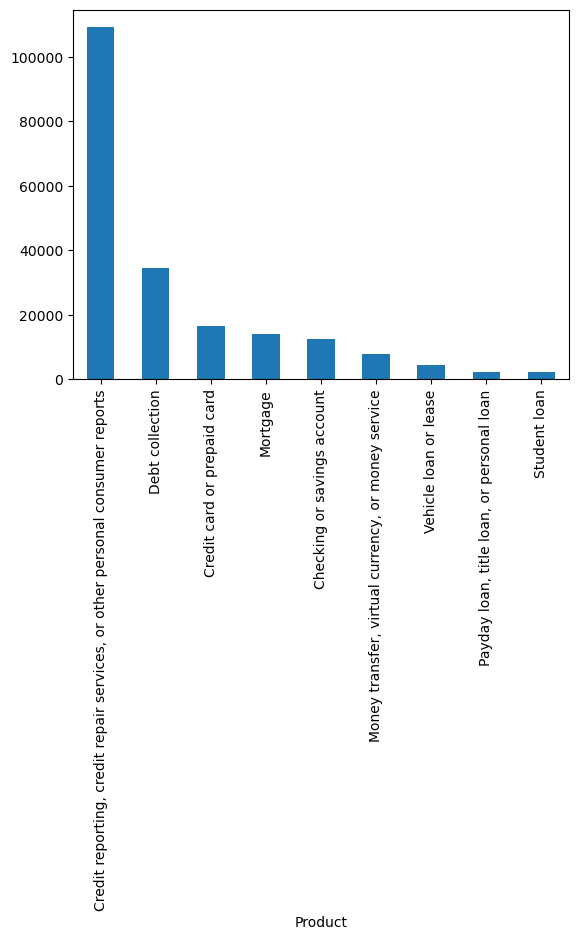

In [3]:
# Focus of the analysis will be on the unstructured consumer complaint narrative
# Product and Date will be kept for subsequent filtering purposes to narrow down the data
df = df[['Date received', 'Product','Consumer complaint narrative']]
df['Date received']= pd.to_datetime(df['Date received'])

# Removal of records where the column "Consumer complaint narrative" is equal to "NaN"
df = df[df['Consumer complaint narrative'].notna()]

# Limit to one year
df = df[(df['Date received'].dt.year == 2021)]

# Determine the number of complaints/documents/rows
print("Number of complaints:", len(df))

# Printing the number of complaints per product to identify the respective distribution and subsequently further restrict the data
df['Product'].value_counts().plot(kind='bar')

## (3.1.b) Data Filtering (2/2)

In [4]:
# Focusing on the product category with the highest number of complaints
df = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports') ]

# Printing the number of complaints under consideration for all the subsequent NLP steps
print("Number of complaints:", len(df))

Number of complaints: 109189


## (3.2) Tokenization including removal of stopwords, capitalization & filtering on alphabetic data

In [5]:
# Stopword definition in terms of taking the English stopwords
# Additional stopwords are added which have been identified based on a first look on the data as not adding value during further analysis
stopwords = stopwords.words('english') + ["xx", "xxxx","im","please","xxxxxxxx"]

# Tokenization to split consumer complaint narrative into words
# w.lower() converts all words into lowercase to make sure capitalization is not leading to considering the same word differently 
# stopwords are removed to filter out low-value information
# w.alpha() limits the tokenized data to alphabetics thereby removing punctuation, numeric information, brackets, etc.
def tokenize (column):
    token_data = nltk.word_tokenize(column)
    return [w.lower() for w in token_data if w.lower() not in stopwords and w.isalpha() and len(w)>2]


df['token_data'] = df['Consumer complaint narrative'].apply(lambda x: tokenize(x))

df.head()

,Date received,Product,Consumer complaint narrative,token_data
32249,2021-12-10,"Credit reporting, credit repair services, or other personal consumer reports","XX/XX/XXXX According to the Fair Credit Act, Section 609 ( a ) ( 1 ) ( A ), you are required by law to verify through the physical verification of the original signed consumer contract any and all accounts you post on a credit report. otherwise, anyone paying your reporting services could fax, mail, or email in a fradulent account.I demand to see verifiable proof ( AN ORIGINAL CONSUMER CONTRACT with my Signature on it ) you have on file of the accounts listed below. Your failure to positively verify these accounts has hurt my ability to obtain credit. under the FCRA, UNVERIFIED ACCOUNTS MUST BE REMOVED AND IF ARE UNABLE TO PROVIDE ME a copy of verifiable proof, you must remove the accounts listed below.\n\nI Demand the following accounts be verified or removed immediately. \n1. INQUIRY : XXXX XXXX XXXX ( INQUIRY XXXX ) 2. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 3. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 4. ( Account name XXXX XXXX XXXX XX/XX/XXXX Account number XXXX Account type Debt Buyer ) 5XXXX XXXX XXXXAccount XXXX XX/XX/XXXX Updated. The information you disputed has been verified as accurate ; however, information unrelated to your dispute has been updated. Please review your report for the details. \n6.Report Number XXXX Date Generated XX/XX/XXXX >Please remove all non-account holding inquiries over 30 days old. \n<Please add a Promotional Suppression to my credit file. \n<Please remove all accounts that are no XXXX XXXX COMPLAINCE. \nPLEASE NOTE THAT YOU HAVE 30 DAYS TO COMPLETE THIS INVESTIGATION, AS PER THE Fair Credit Reporting Act Section 611 ( a ) ( 1 ) ( A ). be advised that the description of the procedure used to determine the ACCURACY AND COMPLETENESS OF THE INFORMATION IS HEARBY REQUESTED AS WELL, to be provided within ( 5 ) days of the completion of your re-investigation and I am keeping a careful record of your actions, INCLUDING YOUR METHOD OF VERIFICATION. I DO NOT CONSENT TO E-OSCAR AR ANY MEANS OF AUTOMATED VERIFICATION.\n\nFailure to respond satisfaction within 30 days of receipt of this certified letter may result in small claims action against your company, seeking {$5000.00} per violation for : 1. ) Defamation 2. ) Negligent Enablement of Identity Fraud 3. ) Violation of Fair Credit Reporting Act 4. ) Financial injury","[according, fair, credit, act, section, required, law, verify, physical, verification, original, signed, consumer, contract, accounts, post, credit, report, otherwise, anyone, paying, reporting, services, could, fax, mail, email, fradulent, demand, see, verifiable, proof, original, consumer, contract, signature, file, accounts, listed, failure, positively, verify, accounts, hurt, ability, obtain, credit, fcra, unverified, accounts, must, removed, unable, provide, copy, verifiable, proof, must, remove, accounts, listed, demand, following, accounts, verified, removed, immediately, inquiry, inquiry, inquiry, inquiry, inquiry, inquiry, account, name, account, number, account, type, debt, buyer, xxxxaccount, updated, information, disputed, verified, accurate, however, information, unrelated, dispute, updated, review, report, details, number, date, generated, remove, holding, ...]"
32253,2021-07-15,"Credit reporting, credit repair services, or other personal consumer reports","These are unauthorized inquires on my consumer credit profile that I want BLOCKED AND REMOVED IMMEDIATELY from my profile, Pursuant to 15 U.S. Code 1681b ( a ) IN GERNERAL, subject to subsection ( c ) any consumer reporting agency may furnish a consumer report under the following circumstances and no other : ( 2 ) in accordance with the written instructions of the consumer to whom it relates. I Never gave Transunion any written consent to report anything on my consumer report, No consent is Identity theft this is infringement and I want the following accounts B

## (3.3.a) Lemmatization (without POS)

In [6]:
# This code is commented out as Lemmatization with POS tagging is preferred over non-POS tagging as POS tagging is increasing the accuracy of lemmatization due to the fact that the word class is considered

#lm = WordNetLemmatizer()

#df['lemmatized_tokens'] = df['token_data'].apply(lambda token_list: [lm.lemmatize(token) for token in token_list])

#df.head()

## (3.3.b) Lemmatization (with POS)

In [7]:
# This code is commented out as running V2 has shown that only considering adjectives & nouns is not leading to worse results than considering all word classes 


#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_with_pos(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N'):  # Noun
            #lemmatized_tokens.append(lm.lemmatize(token, 'n'))
        #elif tag.startswith('V'):  # Verb
            #lemmatized_tokens.append(lm.lemmatize(token, 'v'))
        #elif tag.startswith('R'):  # Adverb
            #lemmatized_tokens.append(lm.lemmatize(token, 'r'))
        #elif tag.startswith('J'):  # Adjective
            #lemmatized_tokens.append(lm.lemmatize(token, 'a'))
        #else:
            #lemmatized_tokens.append(lm.lemmatize(token))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens'] = df['Pos_Tag'].apply(lambda token_list: lemmatize_with_pos(token_list))

#df.drop('Pos_Tag', axis=1)

#df.head()

## (3.3.c) Lemmatization (with POS) including only nouns and adjectives

In [8]:
# This code is commented out as running V3 has shown that (faster) stemming is not leading to a major decrease in performance compared to lemmatization
# Compared to stemming, lemmatization is generally considering the meaning of the word when removing endings 


#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_nouns_adjectives(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N') or tag.startswith('J'):
            #lemmatized_tokens.append(lm.lemmatize(token, pos = 'a' if tag.startswith('J') else 'n'))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens']=df['Pos_Tag'].apply(lambda token_list: lemmatize_nouns_adjectives(token_list))

#df.drop('Pos_Tag', axis =1)

#df.head()

## (3.3.d) Stemming including filtering on nouns + adjectives only

In [9]:
# Pos tagging is used to identify the word class and restrict the data to only nouns and adjectives, i.e. all other word classes are filtered out
# V2 has shown that only considering adjectives & nouns is not leading to worse results than considering all word classes
# Only looking at adjectives & nouns is thus preferred in order to restrict the data under consideration and remove unnecessary noise
def pos_tagging (token_data):
    pos_tags = pos_tag(token_data)
    filtered_tokens = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J')]
    return filtered_tokens

df['filtered_data']=df['token_data'].apply(pos_tagging)

# Stemming is used to reduce the words to their "stems" thereby aiming to consider words with the same stem only once instead of multiple times but with different endings
# V3 has shown that (faster) stemming is not leading to a major decrease in performance compared to lemmatization 
# Stemming is thus preferred in order to increase performance
def stemming (filtered_tokens):
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(word) for word in filtered_tokens]
    return tokens_stemmed

df['stemmed_data']=df['filtered_data'].apply(stemming)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data
32249,2021-12-10,"Credit reporting, credit repair services, or other personal consumer reports","XX/XX/XXXX According to the Fair Credit Act, Section 609 ( a ) ( 1 ) ( A ), you are required by law to verify through the physical verification of the original signed consumer contract any and all accounts you post on a credit report. otherwise, anyone paying your reporting services could fax, mail, or email in a fradulent account.I demand to see verifiable proof ( AN ORIGINAL CONSUMER CONTRACT with my Signature on it ) you have on file of the accounts listed below. Your failure to positively verify these accounts has hurt my ability to obtain credit. under the FCRA, UNVERIFIED ACCOUNTS MUST BE REMOVED AND IF ARE UNABLE TO PROVIDE ME a copy of verifiable proof, you must remove the accounts listed below.\n\nI Demand the following accounts be verified or removed immediately. \n1. INQUIRY : XXXX XXXX XXXX ( INQUIRY XXXX ) 2. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 3. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 4. ( Account name XXXX XXXX XXXX XX/XX/XXXX Account number XXXX Account type Debt Buyer ) 5XXXX XXXX XXXXAccount XXXX XX/XX/XXXX Updated. The information you disputed has been verified as accurate ; however, information unrelated to your dispute has been updated. Please review your report for the details. \n6.Report Number XXXX Date Generated XX/XX/XXXX >Please remove all non-account holding inquiries over 30 days old. \n<Please add a Promotional Suppression to my credit file. \n<Please remove all accounts that are no XXXX XXXX COMPLAINCE. \nPLEASE NOTE THAT YOU HAVE 30 DAYS TO COMPLETE THIS INVESTIGATION, AS PER THE Fair Credit Reporting Act Section 611 ( a ) ( 1 ) ( A ). be advised that the description of the procedure used to determine the ACCURACY AND COMPLETENESS OF THE INFORMATION IS HEARBY REQUESTED AS WELL, to be provided within ( 5 ) days of the completion of your re-investigation and I am keeping a careful record of your actions, INCLUDING YOUR METHOD OF VERIFICATION. I DO NOT CONSENT TO E-OSCAR AR ANY MEANS OF AUTOMATED VERIFICATION.\n\nFailure to respond satisfaction within 30 days of receipt of this certified letter may result in small claims action against your company, seeking {$5000.00} per violation for : 1. ) Defamation 2. ) Negligent Enablement of Identity Fraud 3. ) Violation of Fair Credit Reporting Act 4. ) Financial injury","[according, fair, credit, act, section, required, law, verify, physical, verification, original, signed, consumer, contract, accounts, post, credit, report, otherwise, anyone, paying, reporting, services, could, fax, mail, email, fradulent, demand, see, verifiable, proof, original, consumer, contract, signature, file, accounts, listed, failure, positively, verify, accounts, hurt, ability, obtain, credit, fcra, unverified, accounts, must, removed, unable, provide, copy, verifiable, proof, must, remove, accounts, listed, demand, following, accounts, verified, removed, immediately, inquiry, inquiry, inquiry, inquiry, inquiry, inquiry, account, name, account, number, account, type, debt, buyer, xxxxaccount, updated, information, disputed, verified, accurate, however, information, unrelated, dispute, updated, review, report, details, number, date, generated, remove, holding, ...]","[fair, credit, act, section, law, verify, physical, verification, original, consumer, contract, post, credit, report, anyone, reporting, services, mail, email, fradulent, demand, verifiable, proof, original, consumer, contract, signature, file, accounts, failure, verify, accounts, ability, credit, fcra, unverified, accounts, unable, provide, copy, verifiable, proof, accounts, demand, accounts, inquiry, inquiry, inquiry, inquiry, inquiry, inquiry, account, name, account, number, account, type, debt, buyer, xxxxaccount, information, verified, accurate, information, unrelated, dispute, review, report, details, number, date, remove,

## (3.4) n-gram Implementation

In [10]:
# The function ngrams is commented out as V4 has shown that trigrams are not leading to major improvements compared to bigrams
# The function bigrams is commented out as V5 has shown that looking at the entire data in terms of bigrams is leading to increased topic modeling coherence scores

#def bigrams(text):
    #bigram = gensim.models.Phrases(text)
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    ##trigram_mod = gensim.models.phrases.Phraser(trigram)
    #return [bigram_mod[doc] for doc in text]
    
#def ngrams(text):
    #bigram = gensim.models.Phrases(text)
    #trigram = gensim.models.Phrases(bigram[text])
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    #trigram_mod = gensim.models.phrases.Phraser(trigram)
    #return [trigram_mod[bigram_mod[doc]] for doc in text]

#df['stemmed_data']=df['stemmed_data'].apply(lambda x:[x])
#df['bigrams']=df['stemmed_data'].apply(bigrams)

#df['bigrams']=[item for sublist in df['bigrams'] for item in sublist]

#df.head()


# Transfering all data into bigrams as V5 has shown that this is leading to increased coherence scores in topic modeling
def create_bigrams(tokens_stemmed):
    bi_grams = list(bigrams(tokens_stemmed))
    return [' '.join(pair) for pair in bi_grams]

df['bigrams']=df['stemmed_data'].apply(create_bigrams)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data,bigrams
32249,2021-12-10,"Credit reporting, credit repair services, or other personal consumer reports","XX/XX/XXXX According to the Fair Credit Act, Section 609 ( a ) ( 1 ) ( A ), you are required by law to verify through the physical verification of the original signed consumer contract any and all accounts you post on a credit report. otherwise, anyone paying your reporting services could fax, mail, or email in a fradulent account.I demand to see verifiable proof ( AN ORIGINAL CONSUMER CONTRACT with my Signature on it ) you have on file of the accounts listed below. Your failure to positively verify these accounts has hurt my ability to obtain credit. under the FCRA, UNVERIFIED ACCOUNTS MUST BE REMOVED AND IF ARE UNABLE TO PROVIDE ME a copy of verifiable proof, you must remove the accounts listed below.\n\nI Demand the following accounts be verified or removed immediately. \n1. INQUIRY : XXXX XXXX XXXX ( INQUIRY XXXX ) 2. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 3. INQUIRY XXXX XXXX XXXX ( INQUIRY XXXX ) 4. ( Account name XXXX XXXX XXXX XX/XX/XXXX Account number XXXX Account type Debt Buyer ) 5XXXX XXXX XXXXAccount XXXX XX/XX/XXXX Updated. The information you disputed has been verified as accurate ; however, information unrelated to your dispute has been updated. Please review your report for the details. \n6.Report Number XXXX Date Generated XX/XX/XXXX >Please remove all non-account holding inquiries over 30 days old. \n<Please add a Promotional Suppression to my credit file. \n<Please remove all accounts that are no XXXX XXXX COMPLAINCE. \nPLEASE NOTE THAT YOU HAVE 30 DAYS TO COMPLETE THIS INVESTIGATION, AS PER THE Fair Credit Reporting Act Section 611 ( a ) ( 1 ) ( A ). be advised that the description of the procedure used to determine the ACCURACY AND COMPLETENESS OF THE INFORMATION IS HEARBY REQUESTED AS WELL, to be provided within ( 5 ) days of the completion of your re-investigation and I am keeping a careful record of your actions, INCLUDING YOUR METHOD OF VERIFICATION. I DO NOT CONSENT TO E-OSCAR AR ANY MEANS OF AUTOMATED VERIFICATION.\n\nFailure to respond satisfaction within 30 days of receipt of this certified letter may result in small claims action against your company, seeking {$5000.00} per violation for : 1. ) Defamation 2. ) Negligent Enablement of Identity Fraud 3. ) Violation of Fair Credit Reporting Act 4. ) Financial injury","[according, fair, credit, act, section, required, law, verify, physical, verification, original, signed, consumer, contract, accounts, post, credit, report, otherwise, anyone, paying, reporting, services, could, fax, mail, email, fradulent, demand, see, verifiable, proof, original, consumer, contract, signature, file, accounts, listed, failure, positively, verify, accounts, hurt, ability, obtain, credit, fcra, unverified, accounts, must, removed, unable, provide, copy, verifiable, proof, must, remove, accounts, listed, demand, following, accounts, verified, removed, immediately, inquiry, inquiry, inquiry, inquiry, inquiry, inquiry, account, name, account, number, account, type, debt, buyer, xxxxaccount, updated, information, disputed, verified, accurate, however, information, unrelated, dispute, updated, review, report, details, number, date, generated, remove, holding, ...]","[fair, credit, act, section, law, verify, physical, verification, original, consumer, contract, post, credit, report, anyone, reporting, services, mail, email, fradulent, demand, verifiable, proof, original, consumer, contract, signature, file, accounts, failure, verify, accounts, ability, credit, fcra, unverified, accounts, unable, provide, copy, verifiable, proof, accounts, demand, accounts, inquiry, inquiry, inquiry, inquiry, inquiry, inquiry, account, name, account, number, account, type, debt, buyer, xxxxaccount, information, verified, accurate, information, unrelated, dispute, review, report, details, number, date,

## (3.5) Final pre-processed data

Top 50 most common bigrams:
[('credit report', 123887), ('ident theft', 29884), ('credit bureau', 28064), ('account credit', 20578), ('consum report', 17714), ('inform credit', 15846), ('report agenc', 15602), ('fair credit', 14448), ('account number', 14337), ('report act', 13586), ('late payment', 12556), ('credit card', 11747), ('report day', 11576), ('item credit', 11373), ('inaccur inform', 10722), ('report credit', 9985), ('credit score', 9366), ('victim ident', 8398), ('credit file', 8357), ('origin creditor', 8341), ('account account', 8324), ('fraudul account', 8108), ('report account', 7926), ('inquiri credit', 7819), ('third parti', 7237), ('sent letter', 6734), ('inform consum', 6544), ('account report', 6053), ('feder law', 6013), ('date inquiri', 5974), ('section titl', 5937), ('theft account', 5805), ('mine ident', 5673), ('credit profil', 5330), ('inquiri date', 5279), ('person inform', 5216), ('day respons', 5123), ('social secur', 5111), ('payment credit', 4808), ('da

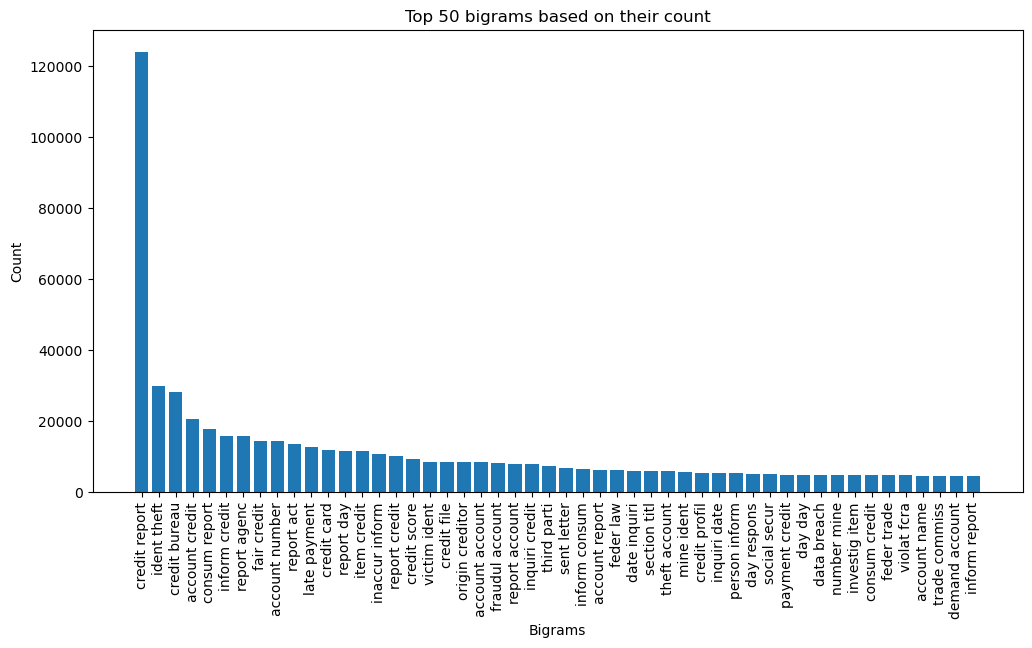

Top 50 bigrams and their frequency:
{'credit report': 1.1346106292758429, 'ident theft': 0.27369057322624074, 'credit bureau': 0.2570222275137605, 'account credit': 0.18846220773154804, 'consum report': 0.16223245931366712, 'inform credit': 0.14512450887909956, 'report agenc': 0.142889851541822, 'fair credit': 0.1323210213483043, 'account number': 0.13130443542847722, 'report act': 0.1244264532141516, 'late payment': 0.11499326855269304, 'credit card': 0.10758409729917849, 'report day': 0.10601800547674216, 'item credit': 0.1041588438395809, 'inaccur inform': 0.09819670479627068, 'report credit': 0.09144694062588722, 'credit score': 0.08577787139730192, 'victim ident': 0.0769125095018729, 'credit file': 0.07653701380175659, 'origin creditor': 0.07639047889439413, 'account account': 0.07623478555532151, 'fraudul account': 0.07425656430592825, 'report account': 0.07258972973468024, 'inquiri credit': 0.07160977754169376, 'third parti': 0.06627957028638416, 'sent letter': 0.061672879136176

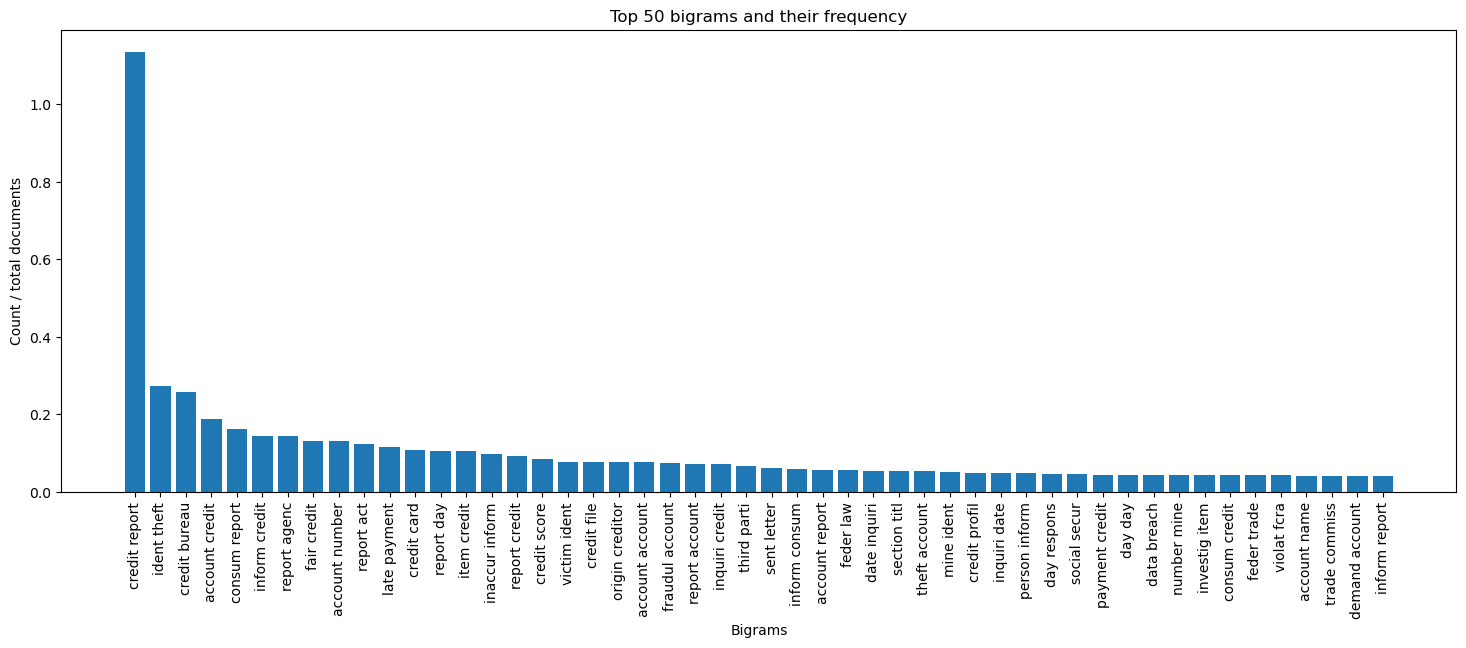

In [11]:
# Determining the top 50 bigrams based on their count over all complaints and plot the results in a bar chart
corpus_Top50 = df['bigrams'].tolist()
list_of_lists = [word for sublist in corpus_Top50 for word in sublist]
word_freq = FreqDist(list_of_lists)
top_50_words = dict(word_freq.most_common(50))

print("Top 50 most common bigrams:")
print(word_freq.most_common(50))

plt.figure(figsize=(12,6))
plt.bar(top_50_words.keys(), top_50_words.values())
plt.xticks(rotation='vertical')
plt.title('Top 50 bigrams based on their count')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.show()


# Determining the number of documents in order to calculate frequency share for the top 50 bigrams, i.e, on average, in how many documents is the bigram appearing
no_documents = len(df)
word_freq_share = {word: freq / no_documents for word, freq in top_50_words.items()}

print("Top 50 bigrams and their frequency:")
print(word_freq_share)

plt.figure(figsize=(18,6))
plt.bar(list(word_freq_share.keys())[:50], list(word_freq_share.values())[:50])
plt.xticks(rotation='vertical')
plt.title('Top 50 bigrams and their frequency')
plt.xlabel('Bigrams')
plt.ylabel('Count / total documents')
plt.show()

In [12]:
# Removal of bigrams which are occuring too often (>=0.5)
frequency_threshold = 0.5

tokenized_data = df['bigrams']
list_tokenized_data = df['bigrams'].tolist()
list_of_lists_full = [word for sublist in list_tokenized_data for word in sublist]

word_freq_full = FreqDist(list_of_lists_full)
words_full = dict(word_freq_full)
no_documents_full = len(df)
word_freq_share_full = {word: freq / no_documents_full for word, freq in words_full.items()}

filtered_data = [[word for word in doc if word_freq_share_full[word] <= frequency_threshold] for doc in tokenized_data]

# (4) Vectorization

## (4.1) BoW

In [13]:
# Using gensim for BoW vectorization as a basis for subsequent topic modeling
# Defining a corpus and dictionary is the basic for vectorization in gensim
corpus = filtered_data
dictionary = corpora.Dictionary(corpus)

# Filtering out bigrams that occur too frequently or too rarely
# Too frequently is added despite having filtered out bigrams above based on their frequency as the approach here is slightly different
# Based on below values, documents are filtered out which occur in less than 10 documents or occur in more than 95% of documents
dictionary.filter_extremes(no_below=10, no_above=0.95)
bow = [dictionary.doc2bow(text) for text in corpus] 
id_words_bow = [[(dictionary[id], count) for id, count in line] for line in bow]

# Printing of first five results as exemplary output
print(id_words_bow[:5])


[[('abil credit', 1), ('account abil', 1), ('account demand', 1), ('account failur', 1), ('account inquiri', 1), ('account name', 1), ('account note', 1), ('account number', 1), ('account type', 1), ('account unabl', 1), ('accur inform', 1), ('accuraci complet', 1), ('act financi', 1), ('act section', 2), ('action compani', 1), ('action method', 1), ('add promot', 1), ('anyon report', 1), ('care record', 1), ('certifi letter', 1), ('claim action', 1), ('compani violat', 1), ('complet inform', 1), ('complet investig', 1), ('consent verif', 1), ('consum contract', 2), ('contract post', 1), ('contract signatur', 1), ('copi verifi', 1), ('credit act', 1), ('credit fcra', 1), ('credit file', 1), ('date remov', 1), ('day certifi', 1), ('day complet', 2), ('day old', 1), ('debt buyer', 1), ('defam neglig', 1), ('demand account', 1), ('demand verifi', 1), ('descript procedur', 1), ('detail number', 1), ('determin accuraci', 1), ('disput review', 1), ('enabl ident', 1), ('failur respond', 1), (

## (4.2) TF-IDF 

In [14]:
# Using gensim for TFIDF vectorization as a basis for subsequent topic modeling
tfidf_model = TfidfModel(dictionary=dictionary, smartirs='ntc')
tfidf = [tfidf_model[dictionary.doc2bow(text)] for text in corpus]

id_words_tfidf = [[(dictionary[id], np.around(freq,decimals=2)) for id, freq in line] for line in tfidf_model[bow]]

# Printing of first five results as exemplary output
print(id_words_tfidf[:5])


[[('abil credit', 0.06), ('account abil', 0.08), ('account demand', 0.08), ('account failur', 0.1), ('account inquiri', 0.06), ('account name', 0.06), ('account note', 0.11), ('account number', 0.04), ('account type', 0.08), ('account unabl', 0.08), ('accur inform', 0.06), ('accuraci complet', 0.08), ('act financi', 0.13), ('act section', 0.12), ('action compani', 0.08), ('action method', 0.12), ('add promot', 0.13), ('anyon report', 0.09), ('care record', 0.07), ('certifi letter', 0.07), ('claim action', 0.07), ('compani violat', 0.09), ('complet inform', 0.08), ('complet investig', 0.08), ('consent verif', 0.12), ('consum contract', 0.13), ('contract post', 0.09), ('contract signatur', 0.06), ('copi verifi', 0.09), ('credit act', 0.09), ('credit fcra', 0.09), ('credit file', 0.04), ('date remov', 0.1), ('day certifi', 0.09), ('day complet', 0.16), ('day old', 0.11), ('debt buyer', 0.1), ('defam neglig', 0.09), ('demand account', 0.05), ('demand verifi', 0.07), ('descript procedur', 0

# (5) Topic Modeling

## (5.1) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with BoW

Coherence score with 2 clusters: 0.3517929051929826
Coherence score with 3 clusters: 0.40646624834703143
Coherence score with 4 clusters: 0.38961179869677026
Coherence score with 5 clusters: 0.3811474845908779
Coherence score with 6 clusters: 0.3259243676146818
Coherence score with 7 clusters: 0.3419105333252882
Coherence score with 8 clusters: 0.3652958686083735
Coherence score with 9 clusters: 0.36576365216368745
Coherence score with 10 clusters: 0.3084712689291212
Coherence score with 11 clusters: 0.3286489440371241
Coherence score with 12 clusters: 0.3587317221773254
Coherence score with 13 clusters: 0.3556856781826708
Coherence score with 14 clusters: 0.36779407770238803
Coherence score with 15 clusters: 0.36361943090614723
Coherence score with 16 clusters: 0.3281980624283174
Coherence score with 17 clusters: 0.35570872854427377
Coherence score with 18 clusters: 0.35801690799776537
Coherence score with 19 clusters: 0.3429950254495
Coherence score with 20 clusters: 0.33267419501471

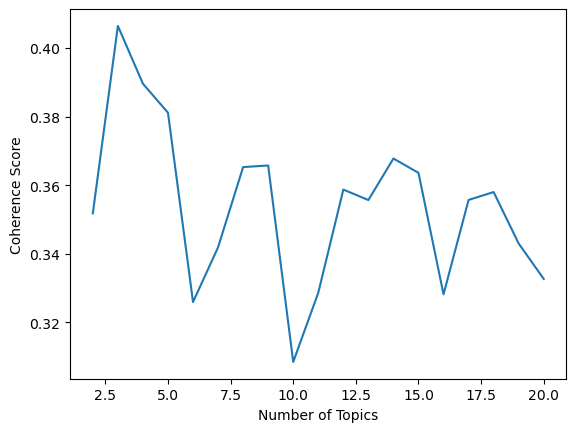

In [15]:
# Running the LSI model based on BoW vectorization and calculating the coherence score for 2 - 20 topics including plotting the results in a line chart
# The result is taken as a basis to decide on an optimal number of topics for LSI
topics = []
score=[]

for i in range(2,21):
    lsi = LsiModel(bow, num_topics = i, id2word = dictionary, power_iters=10)
    coherence_model = CoherenceModel(model=lsi, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))
    
    topics.append(i)
    score.append(coherence_model.get_coherence())
    
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()


# For training purposes in V1 - V5, the maxium score has been selected by default to let the subsequent model continue running automatically
# This has been taken as a basis for comparing model performance
# This code is commented out in the final version as the optimal number of topics is decided on based on visual investigation
# Simply taking the max coherence score might not always be the best choice

#topic_score_dict = dict(zip(topics, score))
#max_dict = max(zip(topic_score_dict.values(),topic_score_dict.keys()))[1]
#print(max_dict)

## (5.2) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with Tf-Idf

Coherence score with 2 clusters: 0.6230020098985765
Coherence score with 3 clusters: 0.5018175144603362
Coherence score with 4 clusters: 0.4775192587538944
Coherence score with 5 clusters: 0.4898480747045017
Coherence score with 6 clusters: 0.6012836423253485
Coherence score with 7 clusters: 0.5380250756278128
Coherence score with 8 clusters: 0.5418101545435807
Coherence score with 9 clusters: 0.5653480528150681
Coherence score with 10 clusters: 0.5394422779866507
Coherence score with 11 clusters: 0.5215906086023346
Coherence score with 12 clusters: 0.4803240925410996
Coherence score with 13 clusters: 0.5750692098136527
Coherence score with 14 clusters: 0.4708387978132477
Coherence score with 15 clusters: 0.39411326707989863
Coherence score with 16 clusters: 0.4412911983344803
Coherence score with 17 clusters: 0.515659517928243
Coherence score with 18 clusters: 0.47493797952668754
Coherence score with 19 clusters: 0.5493804075536312
Coherence score with 20 clusters: 0.5586252327085164


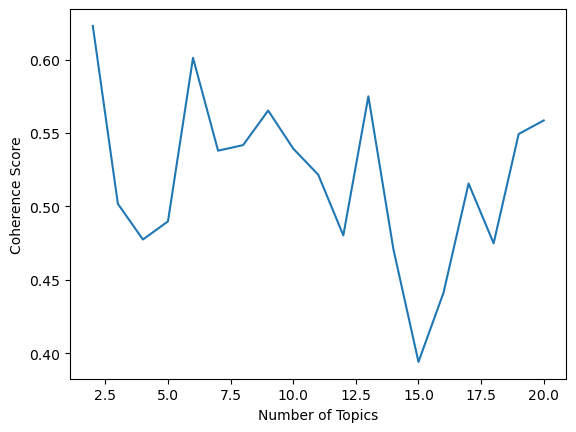

In [16]:
# Running the LSI model based on tfidf vectorization and calculating the coherence score for 2 - 20 topics including plotting the results in a line chart
# The result is taken as a basis to decide on an optimal number of topics for LSI
topics_LSI_tfidf = []
score_LSI_tfidf=[]

for i in range(2,21):
    lsi_tfidf = LsiModel(tfidf, num_topics = i, id2word = dictionary, power_iters = 10)
    coherence_model_tfidf = CoherenceModel(model=lsi_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_tfidf = coherence_model_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_tfidf))
    
    topics_LSI_tfidf.append(i)
    score_LSI_tfidf.append(coherence_model_tfidf.get_coherence())
    
_=plt.plot(topics_LSI_tfidf, score_LSI_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Following comments are the same as for LSI with BoW
# For training purposes in V1 - V5, the maxium score has been selected by default to let the subsequent model continue running automatically
# This has been taken as a basis for comparing model performance
# This code is commented out in the final version as the optimal number of topics is decided on based on visual investigation
# Simply taking the max coherence score might not always be the best choice

#topic_score_dict_tfidf = dict(zip(topics_LSI_tfidf, score_LSI_tfidf))
#max_dict_tfidf = max(zip(topic_score_dict_tfidf.values(),topic_score_dict_tfidf.keys()))[1]
#print(max_dict_tfidf)


## (5.3) Latent Dirichlet Allocation (LDA) with BoW

Coherence score with 2 clusters: 0.311525298201373
Coherence score with 3 clusters: 0.37070975997181677
Coherence score with 4 clusters: 0.4611440596391027
Coherence score with 5 clusters: 0.4848208098284146
Coherence score with 6 clusters: 0.6030294124263947
Coherence score with 7 clusters: 0.5052091143237625
Coherence score with 8 clusters: 0.503095840629772
Coherence score with 9 clusters: 0.5196899376369831
Coherence score with 10 clusters: 0.5358039672650871
Coherence score with 11 clusters: 0.5405361199592642
Coherence score with 12 clusters: 0.4849570354689141
Coherence score with 13 clusters: 0.5098823960457728
Coherence score with 14 clusters: 0.5101677984469595
Coherence score with 15 clusters: 0.5017097365922898
Coherence score with 16 clusters: 0.5539253204571604
Coherence score with 17 clusters: 0.4998168328111943
Coherence score with 18 clusters: 0.5005470088467954
Coherence score with 19 clusters: 0.5146887940351993
Coherence score with 20 clusters: 0.549742883828521


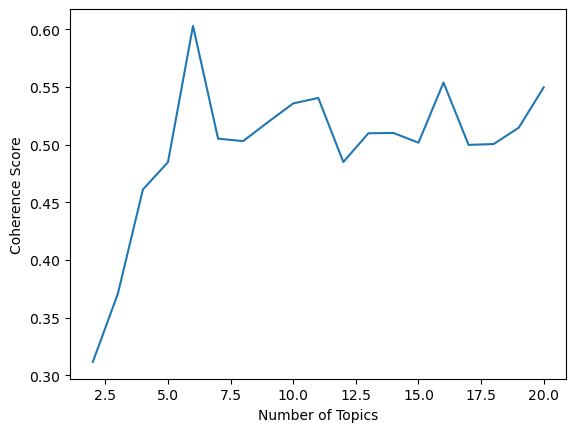

In [17]:
# Running the LDA model based on BoW vectorization and calculating the coherence score for 2 - 20 topics including plotting the results in a line chart
# The result is taken as a basis to decide on an optimal number of topics for LDA

topics_LDA_bow = []
score_LDA_bow=[]

for i in range(2,21):
    lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_bow = CoherenceModel(model=lda_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_bow = coherence_model_lda_bow.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_bow))
    
    topics_LDA_bow.append(i)
    score_LDA_bow.append(coherence_model_lda_bow.get_coherence())
    
_=plt.plot(topics_LDA_bow, score_LDA_bow)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# For training purposes in V1 - V5, the maxium score has been selected by default to let the subsequent model continue running automatically
# This has been taken as a basis for comparing model performance
# This code is commented out in the final version as the optimal number of topics is decided on based on visual investigation
# Simply taking the max coherence score might not always be the best choice

#topic_score_dict_lda_bow = dict(zip(topics_LDA_bow, score_LDA_bow))
#max_dict_lda_bow = max(zip(topic_score_dict_lda_bow.values(),topic_score_dict_lda_bow.keys()))[1]
#print(max_dict_lda_bow)


## (5.4) Latent Dirichlet Allocation (LDA) with Tf-Idf

Coherence score with 2 clusters: 0.3061797669707125
Coherence score with 3 clusters: 0.4771127469394532
Coherence score with 4 clusters: 0.46554899712786363
Coherence score with 5 clusters: 0.2990366974950739
Coherence score with 6 clusters: 0.381070299535421
Coherence score with 7 clusters: 0.540636841270769
Coherence score with 8 clusters: 0.3818073115541133
Coherence score with 9 clusters: 0.44556459361872425
Coherence score with 10 clusters: 0.49672486361419477
Coherence score with 11 clusters: 0.3684080409785334
Coherence score with 12 clusters: 0.46092497047130493
Coherence score with 13 clusters: 0.42000568839151664
Coherence score with 14 clusters: 0.4784750945444292
Coherence score with 15 clusters: 0.43021451859841686
Coherence score with 16 clusters: 0.5059699431441685
Coherence score with 17 clusters: 0.3896037892081386
Coherence score with 18 clusters: 0.45636116725821574
Coherence score with 19 clusters: 0.4506520516099453
Coherence score with 20 clusters: 0.4266097724611

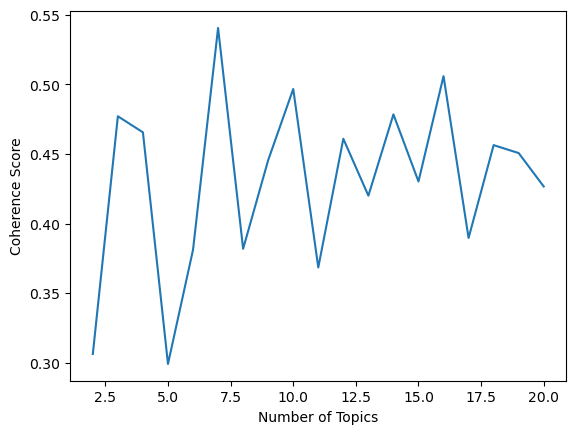

In [18]:
# Running the LDA model based on Tfidf vectorization and calculating the coherence score for 2 - 20 topics including plotting the results in a line chart
# The result is taken as a basis to decide on an optimal number of topics for LDA
topics_LDA_tfidf = []
score_LDA_tfidf=[]

for i in range(2,21):
    lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_tfidf = CoherenceModel(model=lda_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_tfidf))
    
    topics_LDA_tfidf.append(i)
    score_LDA_tfidf.append(coherence_model_lda_tfidf.get_coherence())
    
_=plt.plot(topics_LDA_tfidf, score_LDA_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# For training purposes in V1 - V5, the maxium score has been selected by default to let the subsequent model continue running automatically
# This has been taken as a basis for comparing model performance
# This code is commented out in the final version as the optimal number of topics is decided on based on visual investigation
# Simply taking the max coherence score might not always be the best choice

#topic_score_dict_lda_tfidf = dict(zip(topics_LDA_tfidf, score_LDA_tfidf))
#max_dict_lda_tfidf = max(zip(topic_score_dict_lda_tfidf.values(),topic_score_dict_lda_tfidf.keys()))[1]
#print(max_dict_lda_tfidf)

## (5.5) Hierarchical Dirichlet Process (HDP) with BoW

In [19]:
# Running the HDP model based on BoW vectorization and calculating the coherence score
# Number of topics does not have to be identified as HDP is finding the optimal number of topics itself
hdp_bow = HdpModel(corpus=bow,id2word=dictionary, alpha=0.1, gamma=0.1, chunksize = 1000,random_state = 42)

# Show top 10 words of each of the topics
for topic_num, words in hdp_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))
    
no_topics = topic_num

Words in 0: 0.012*ident theft + 0.009*consum report + 0.008*credit bureau + 0.007*report agenc + 0.006*account credit + 0.005*inform credit + 0.005*credit card + 0.004*report act + 0.004*fair credit + 0.004*late payment.
Words in 1: 0.016*section titl + 0.008*time payment + 0.008*pay amount + 0.008*report creditor + 0.006*payment credit + 0.006*bill error + 0.005*payment due + 0.005*amount obligor + 0.005*due date + 0.005*credit obligor.
Words in 2: 0.010*section section + 0.007*feder trade + 0.007*trade commiss + 0.006*fair credit + 0.006*report act + 0.006*copi origin + 0.006*section fcra + 0.005*feder law + 0.005*ident theft + 0.005*consum financi.
Words in 3: 0.036*report day + 0.020*item credit + 0.020*day respons + 0.019*sent letter + 0.018*account file + 0.018*demand account + 0.018*thing credit + 0.017*file litig + 0.017*unknown thing + 0.017*reason item.
Words in 4: 0.022*consum report + 0.011*report agenc + 0.007*inform consum + 0.005*consum credit + 0.004*consum consum + 0.0

In [20]:
# Topic Coherence for HDP with BoW
coherence_model_hdp_bow = CoherenceModel(model=hdp_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_bow = coherence_model_hdp_bow.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_bow))

Coherence score with 19 clusters: 0.4585841483797858


## (5.6) Hierarchical Dirichlet Process (HDP) with Tf-Idf

In [21]:
# Running the HDP model based on Tfidf vectorization and calculating the coherence score
# Number of topics does not have to be identified as HDP is finding the optimal number of topics itself
hdp_tfidf = HdpModel(corpus=tfidf,id2word=dictionary,alpha=0.1, gamma=0.1, chunksize = 1000,random_state = 42)

# Show top 10 words of each of the topics
for topic_num, words in hdp_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.002*report day + 0.002*unknown thing + 0.002*day respons + 0.002*thing credit + 0.002*inaccur unknown + 0.002*due stress + 0.002*letter inaccur + 0.002*respons advantag + 0.002*account file + 0.002*sent letter.
Words in 1: 0.001*section titl + 0.001*ident theft + 0.001*place knowledg + 0.001*knowledg suspect + 0.000*pay amount + 0.000*suspect money + 0.000*author idea + 0.000*servic ident + 0.000*consent author + 0.000*money good.
Words in 2: 0.000*section section + 0.000*ident theft + 0.000*feder trade + 0.000*time attorney + 0.000*victim ident + 0.000*trade commiss + 0.000*credit bureau + 0.000*fraudul account + 0.000*account credit + 0.000*inform credit.
Words in 3: 0.000*account credit + 0.000*credit bureau + 0.000*report account + 0.000*report due + 0.000*correspond investig + 0.000*send correspond + 0.000*differ day + 0.000*valid suspici + 0.000*date credit + 0.000*origin creditor.
Words in 4: 0.001*process letter + 0.000*month noth + 0.000*act law + 0.000*inform cr

In [22]:
# Topic Coherence for HDP with Tfidf
coherence_model_hdp_tfidf = CoherenceModel(model=hdp_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_tfidf = coherence_model_hdp_tfidf.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_tfidf))

Coherence score with 19 clusters: 0.5631594798297673


In [ ]:
df['Assigned_topic_lda_bow'] = None
df['Topic_score_lda_bow'] = None

topic_space_lda_bow = lda_bow[bow]

for i, (row_index, topic_distribution) in enumerate(zip(df.index,topic_space_lda_bow)):
    dominant_topic = max(topic_distribution, key=lambda x: x[1])
    #print('Row {}: Assigned Topic - {}, Score - {}'.format(i, dominant_topic[0], dominant_topic[1]))
    topic, topic_score = max(topic_distribution, key = lambda x: abs(x[1]))
    df.at[row_index,'Assigned_topic_lda_bow']=dominant_topic[0]
    df.at[row_index,'Topic_score_lda_bow']=dominant_topic[1]
    
df_lda_bow = df[['Consumer complaint narrative', 'Assigned_topic_lda_bow','Topic_score_lda_bow']] 

df_sorted_lda_bow = df_lda_bow.sort_values(by=['Assigned_topic_lda_bow','Topic_score_lda_bow'],ascending=[True,False])

df_sorted_lda_bow = df_sorted_lda_bow.groupby('Assigned_topic_lda_bow').head(5)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
display(df_sorted_lda_bow)

# (6) Result Discussion

Comparing the coherence scores for the topic modeling techniques LSI, LDA and HDP, all three with BoW and TF-IDF vectorization,
LDA with BoW shows the highest and most consistent coherence score. 
Respectively, V7 will be run by limiting to vectorization = BoW and topic modeling = LDA with number of topics = 6 with the target
to derive a topic proposal for the imported data of 2021 for the product "Credit reporting, credit repair services, or other personal consumer reports". 